In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
diamonds = sns.load_dataset("diamonds")

In [ ]:
# Explore the dataset
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
#display all columns
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
#display columns contents
diamonds["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [ ]:
print(diamonds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


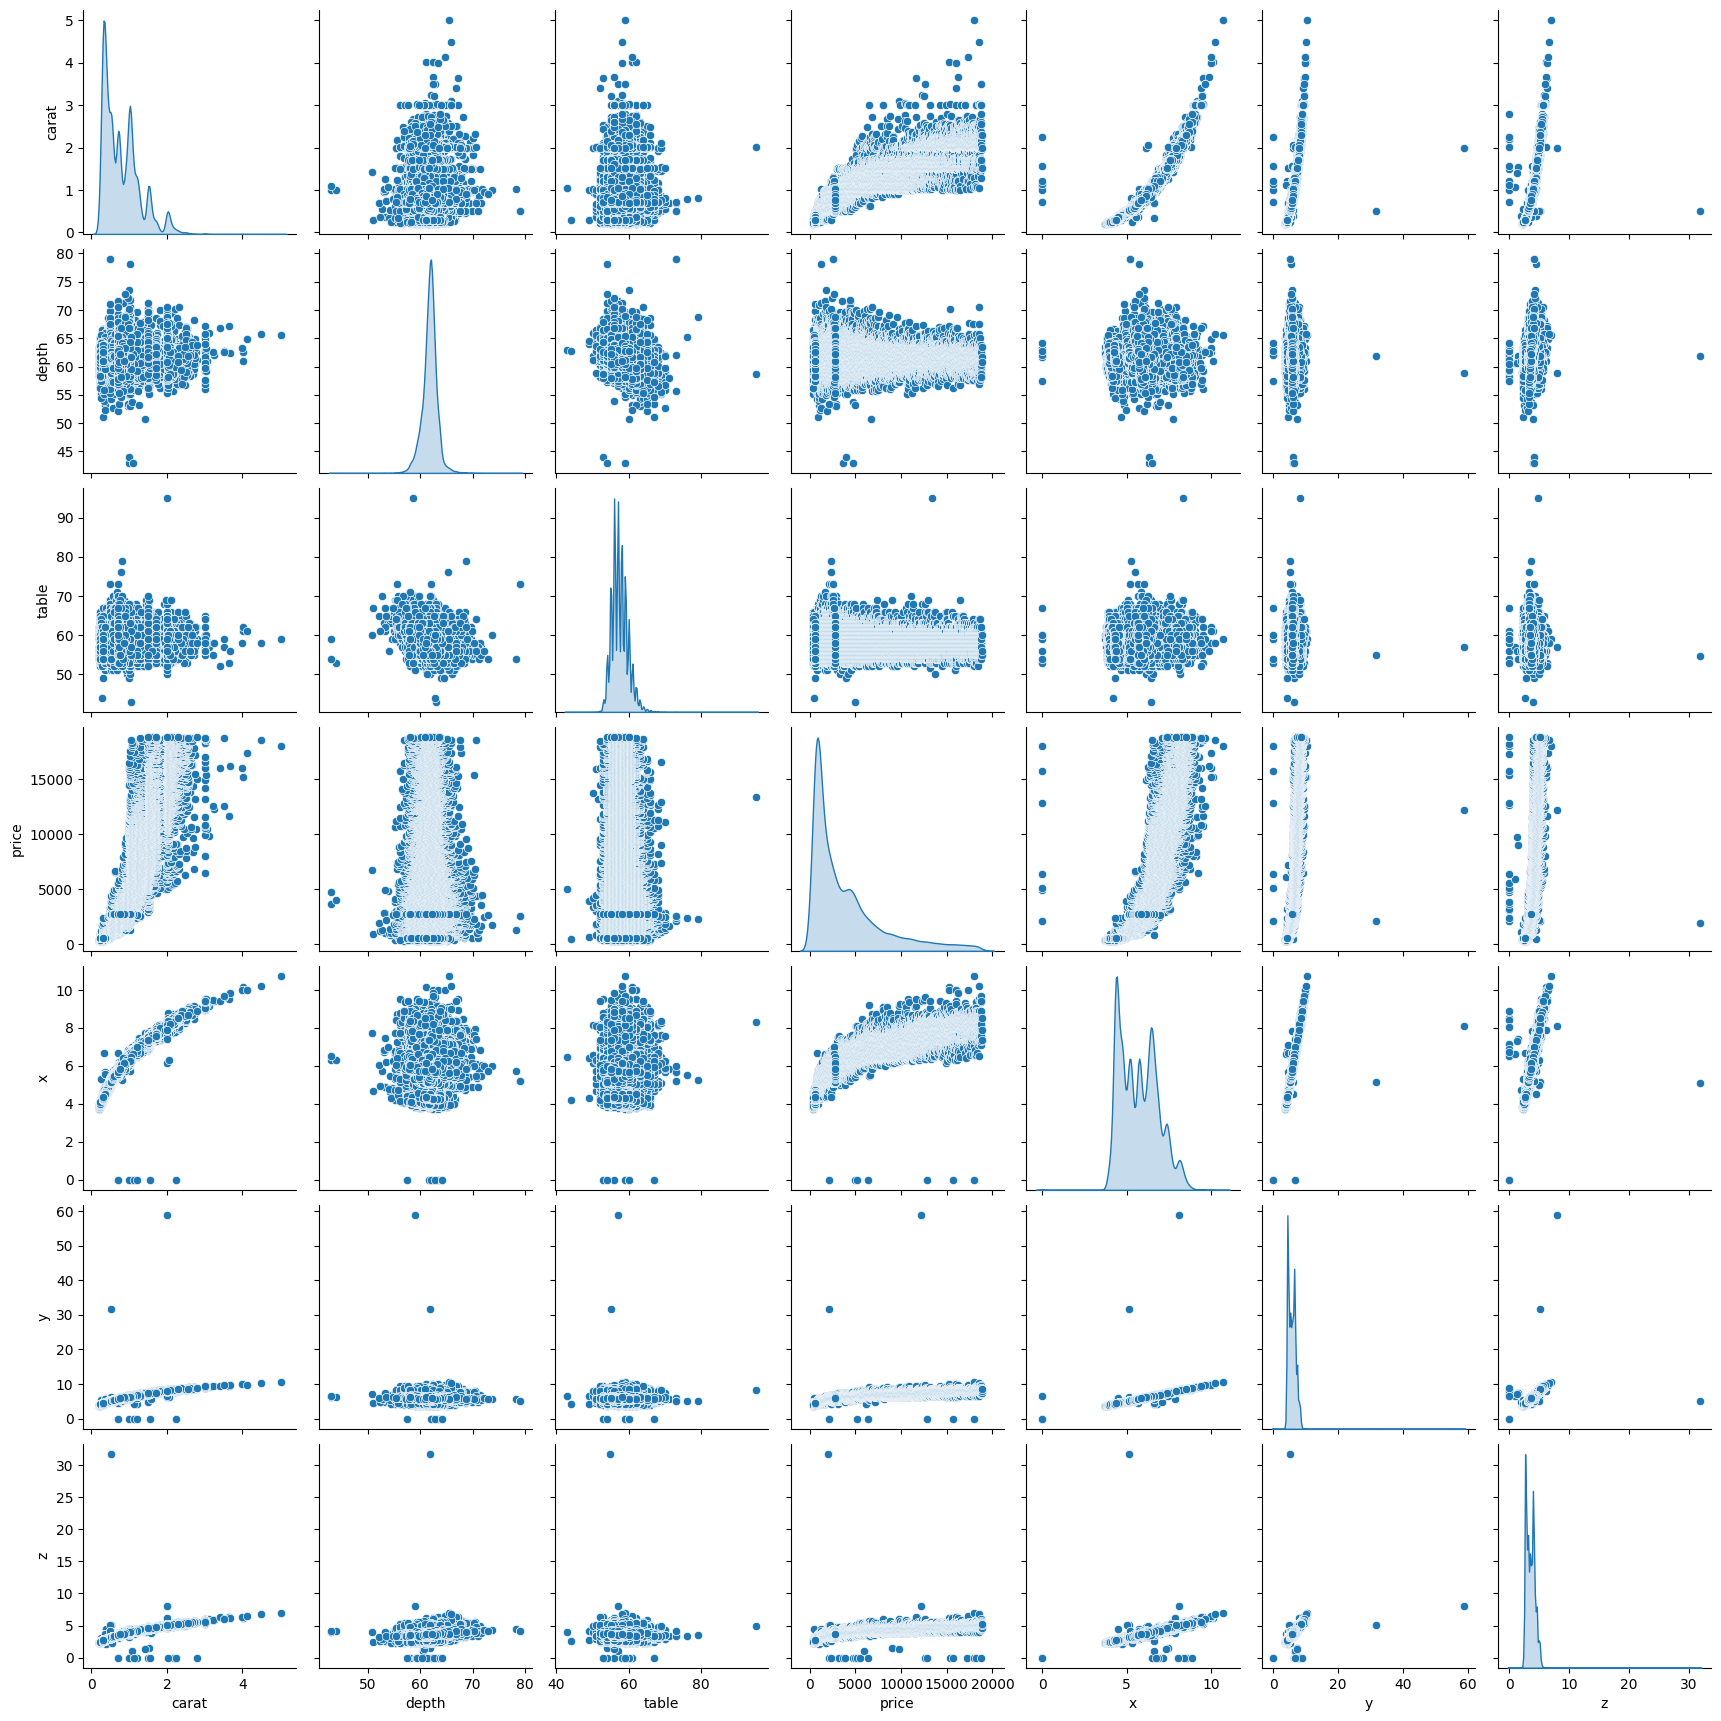

In [ ]:
# Data visualization
sns.pairplot(diamonds, diag_kind='kde')
plt.show()

In [ ]:
# Select features (predictors) and target variable
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]  # Using multiple features
y = diamonds['price']  # Predicting diamond price

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 2242178.9040856035
R-squared: 0.8589542625888938


In [ ]:
# Create a function for prediction using the trained model
def predict_price(carat, depth, table, x, y, z):
    """
    Predicts the price of a diamond using the trained linear regression model.

    Args:
        carat (float): Carat weight of the diamond.
        depth (float): Depth percentage.
        table (float): Table percentage.
        x (float): Length in mm.
        y (float): Width in mm.
        z (float): Depth in mm.

    Returns:
        float: Predicted diamond price.
    """
    features = np.array([[carat, depth, table, x, y, z]])
    predicted_price = model.predict(features)
    return predicted_price[0]

# Example usage of the prediction function
predicted_price = predict_price(1.2, 61.5, 57.0, 6.75, 6.79, 4.18)
print("Predicted Price:", predicted_price)

Predicted Price: 7093.840521092576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
